## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

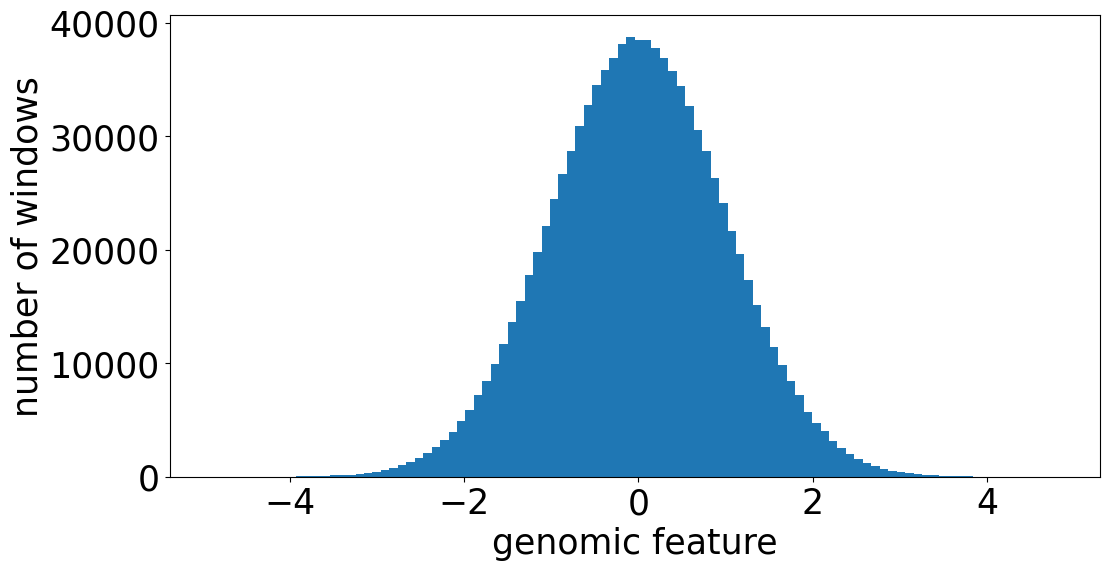

In [1]:
import matplotlib.pyplot as plt

from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 1000000 # Number of intervals

plot_xs(NUMBER_EXAMPLES)

## True mapping from feature to target (mimicking SNV counts)

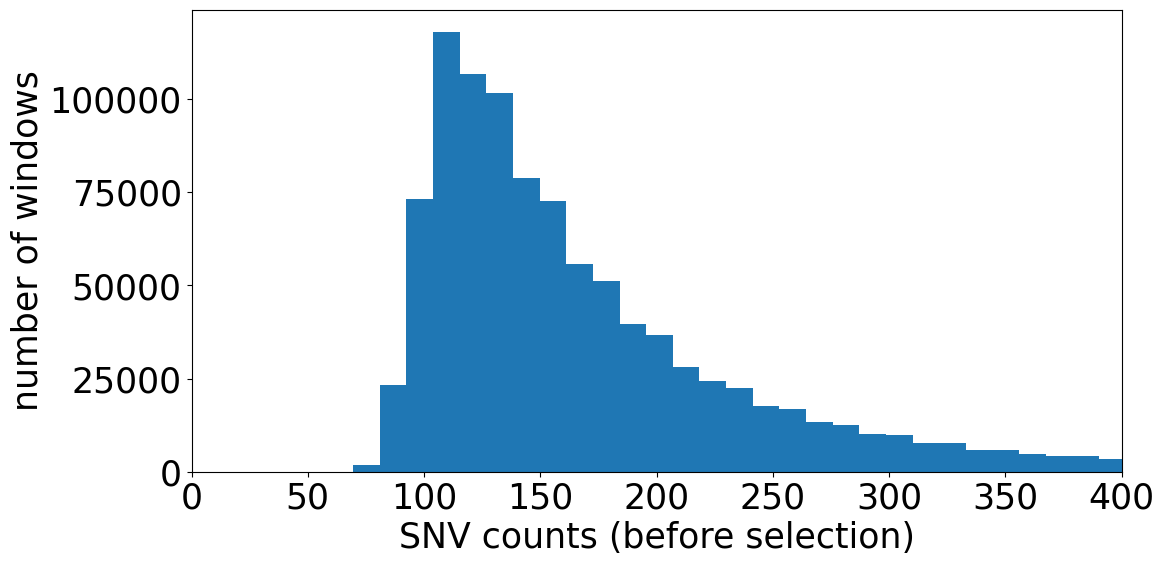

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,0.842057,219,True
1,1.331735,248,True
2,0.736947,193,True
3,-0.095445,135,True
4,0.208396,107,True
...,...,...,...
999995,0.426553,174,False
999996,0.688631,230,False
999997,-1.637736,130,False
999998,1.413775,335,False


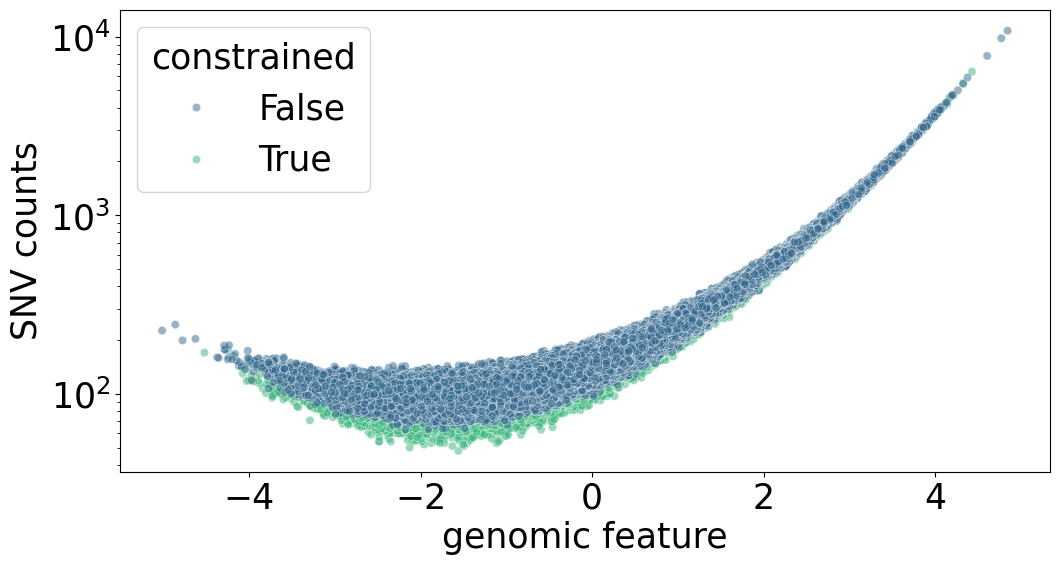

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_1

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_1)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



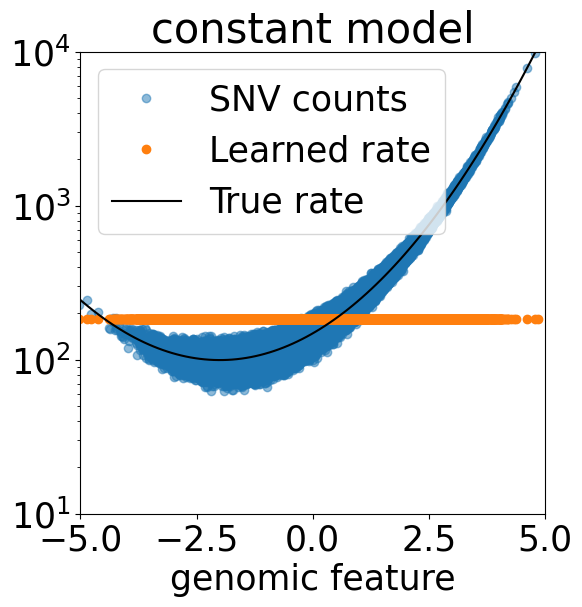

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



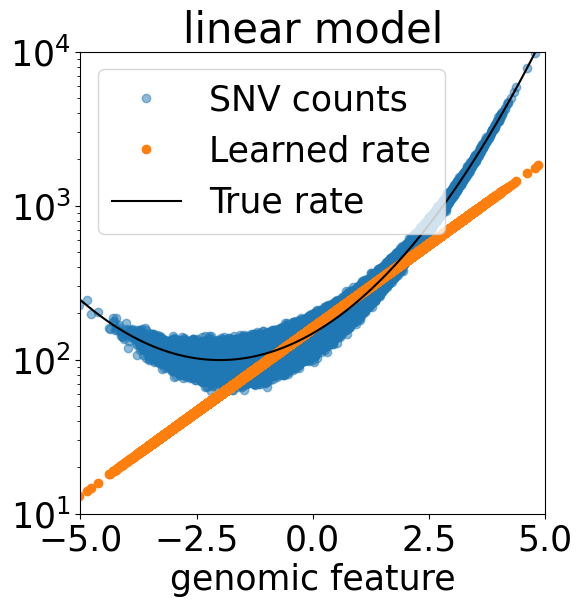

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



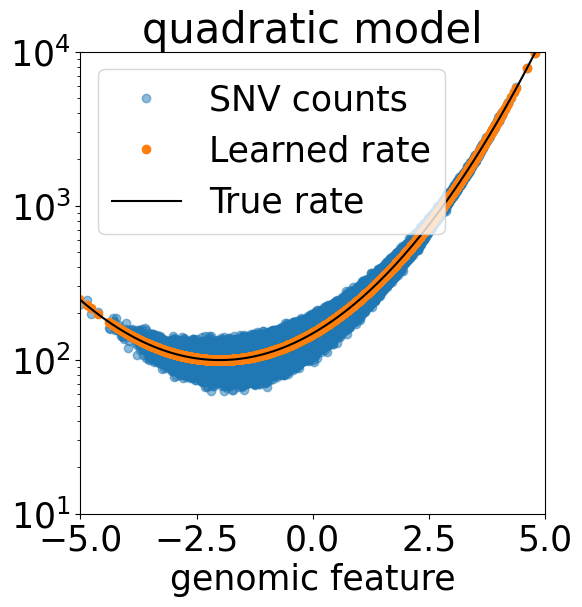

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,0.842057,219,True,183.54953,-35.45047,-2.616648,246.659710,27.659710,1.761159,0.709060,223.140380,4.140380,0.277173
1,1.331735,248,True,183.54953,-64.45047,-4.757179,315.232238,67.232238,3.786712,1.773519,301.902622,53.902622,3.102248
2,0.736947,193,True,183.54953,-9.45047,-0.697552,234.008131,41.008131,2.680739,0.543092,210.432017,17.432017,1.201688
3,-0.095445,135,True,183.54953,48.54953,3.583508,154.219385,19.219385,1.547640,0.009110,142.996377,7.996377,0.668699
4,0.208396,107,True,183.54953,76.54953,5.650227,179.573147,72.573147,5.415708,0.043429,162.030520,55.030520,4.323199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.426553,174,False,183.54953,9.54953,0.704864,200.310014,26.310014,1.858959,0.181947,179.270541,5.270541,0.393641
999996,0.688631,230,False,183.54953,-46.45047,-3.428574,228.412301,-1.587699,-0.105053,0.474213,204.987578,-25.012422,-1.746996
999997,-1.637736,130,False,183.54953,53.54953,3.952565,71.220388,-58.779612,-6.965055,2.682178,100.806119,-29.193881,-2.907692
999998,1.413775,335,False,183.54953,-151.45047,-11.178769,328.457275,-6.542725,-0.361010,1.998760,319.080006,-15.919994,-0.891237


In [4]:
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

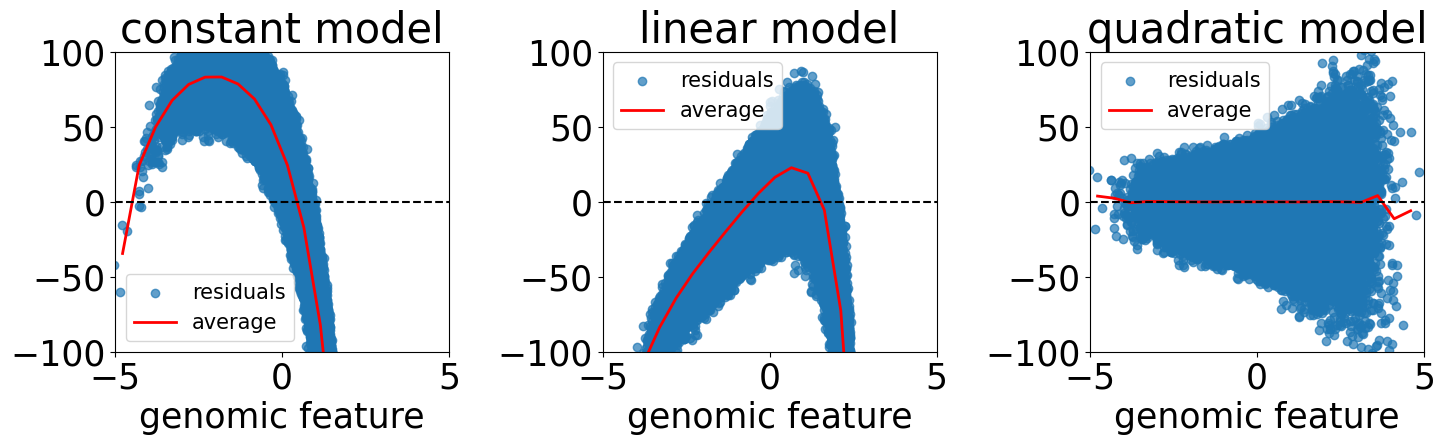

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

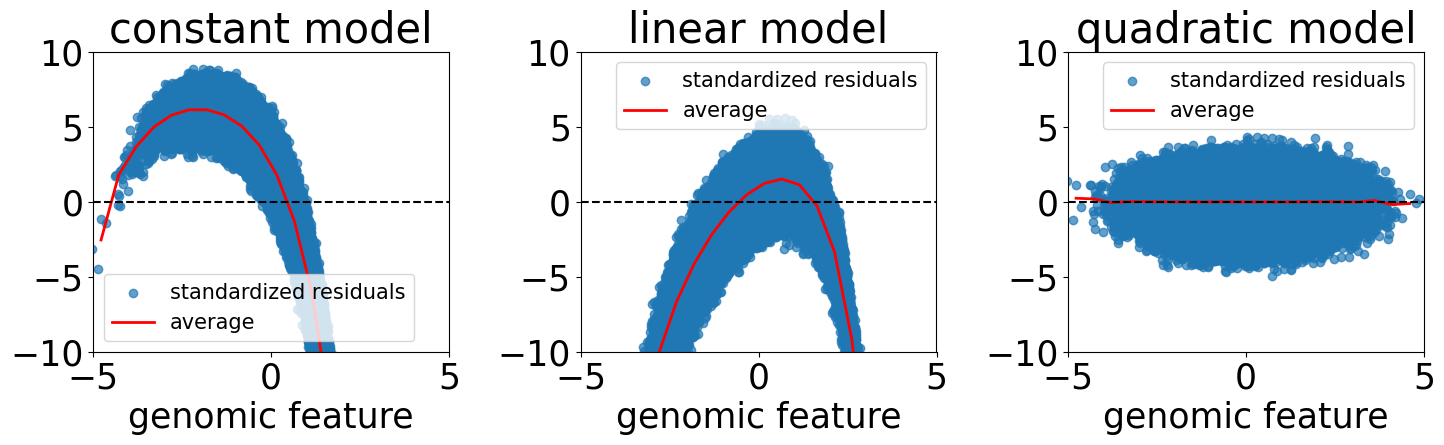

In [5]:
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 25})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES)

## Stratify neutral models' performances by x

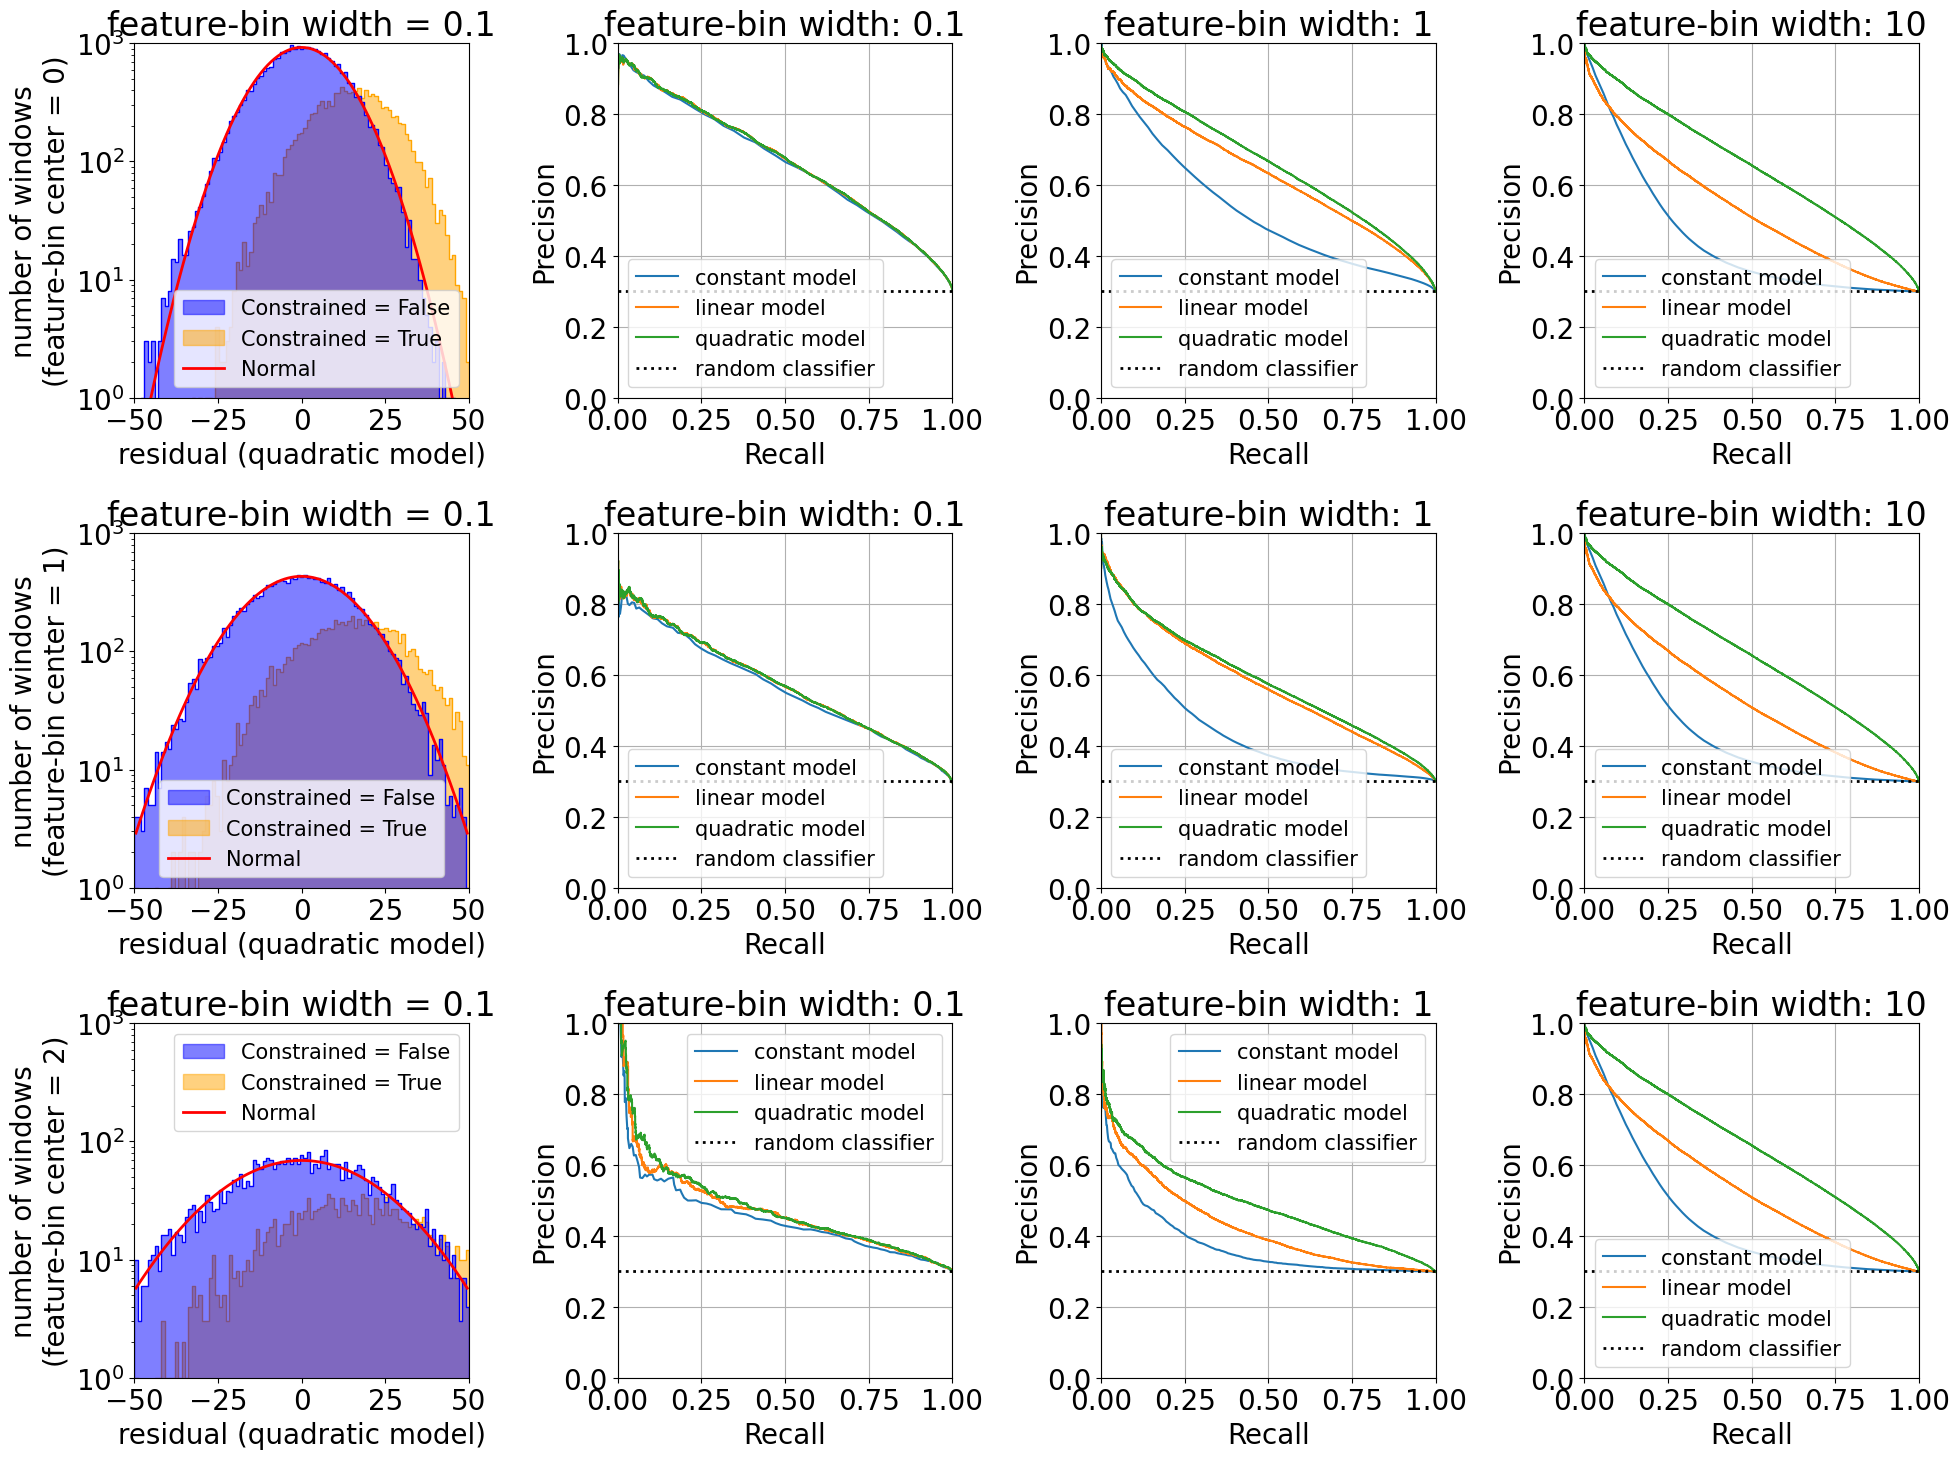

In [6]:
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION)

## Model bias is responsible for poor genome-wide performance 

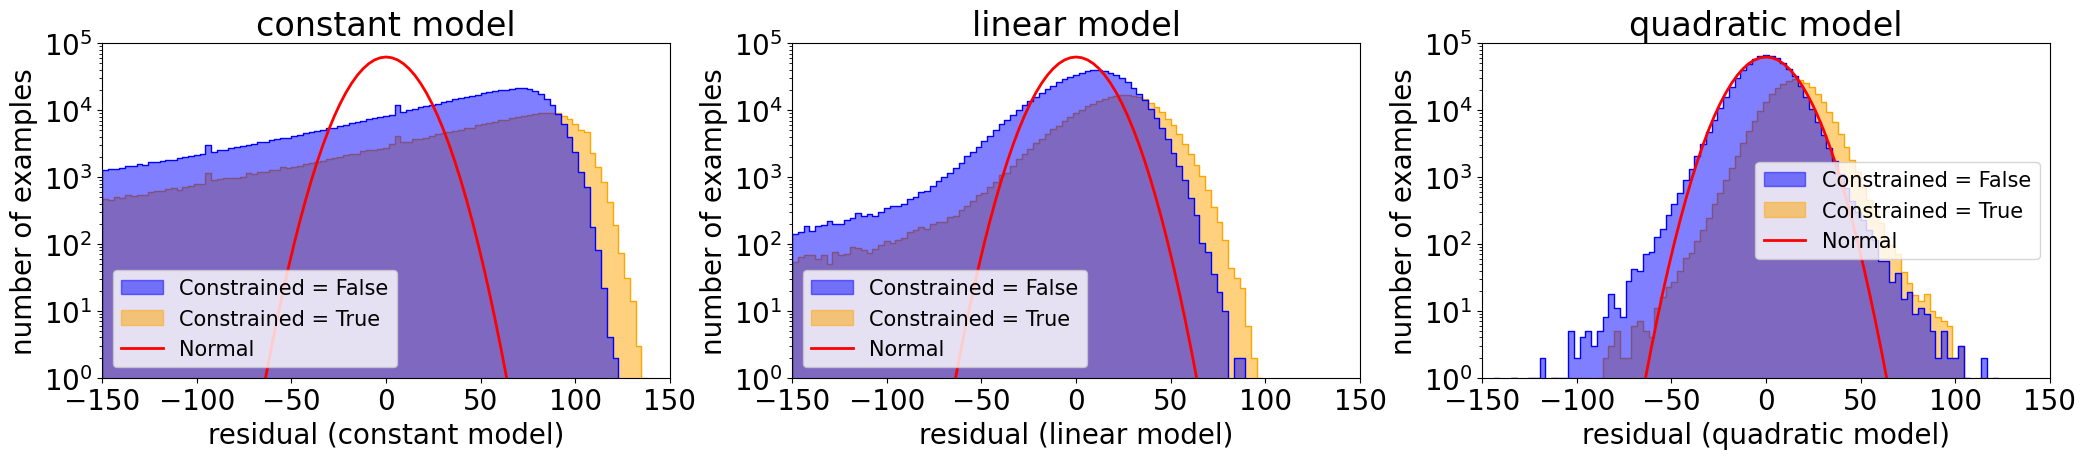

In [7]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

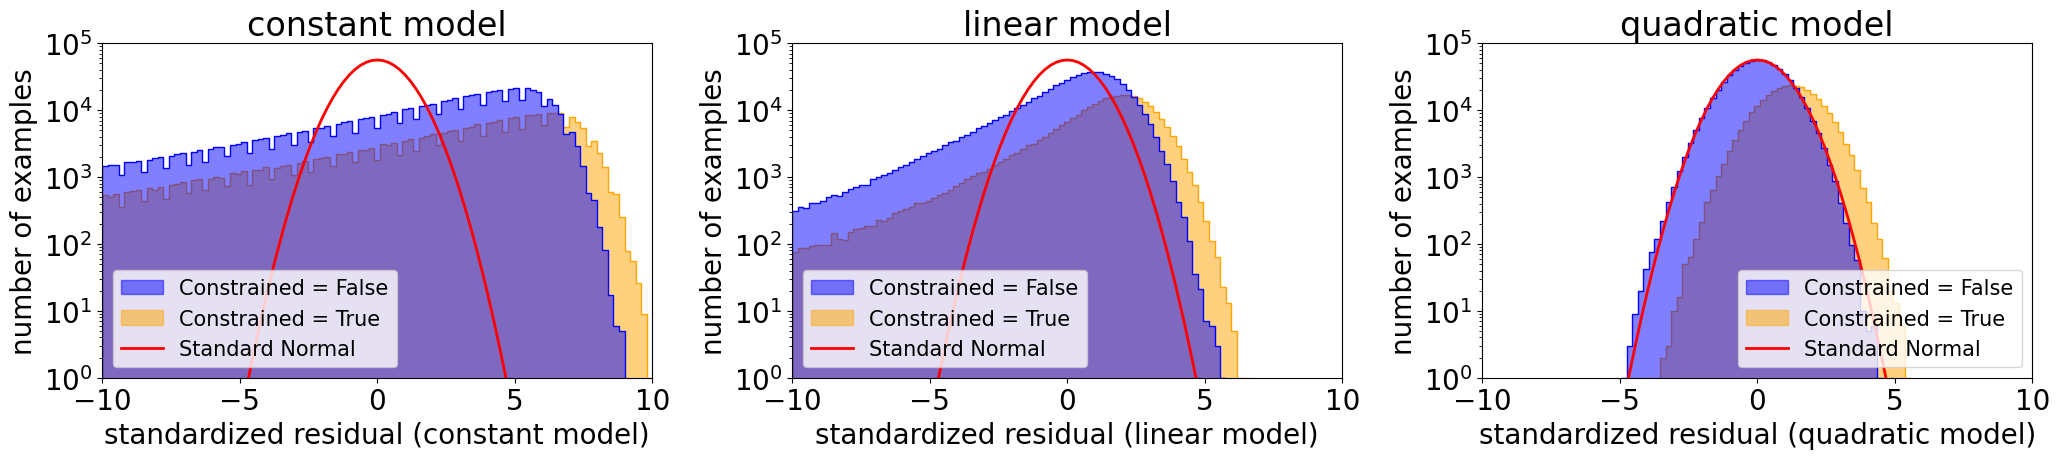

In [8]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


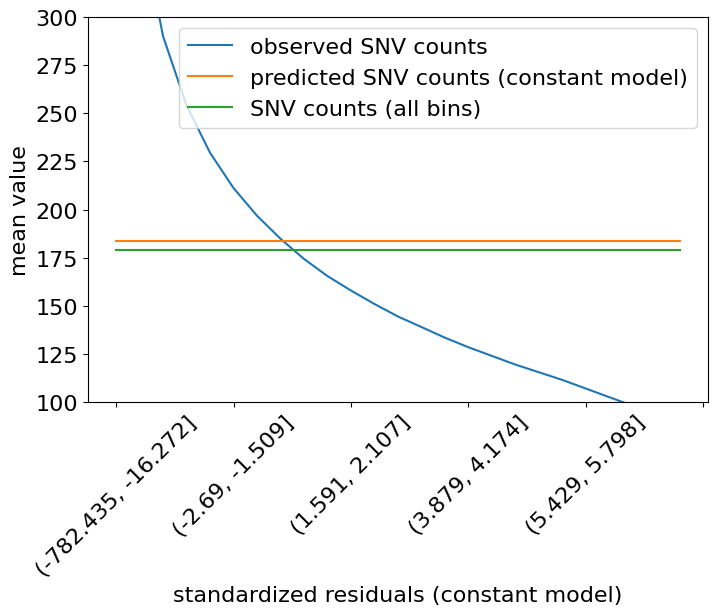

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


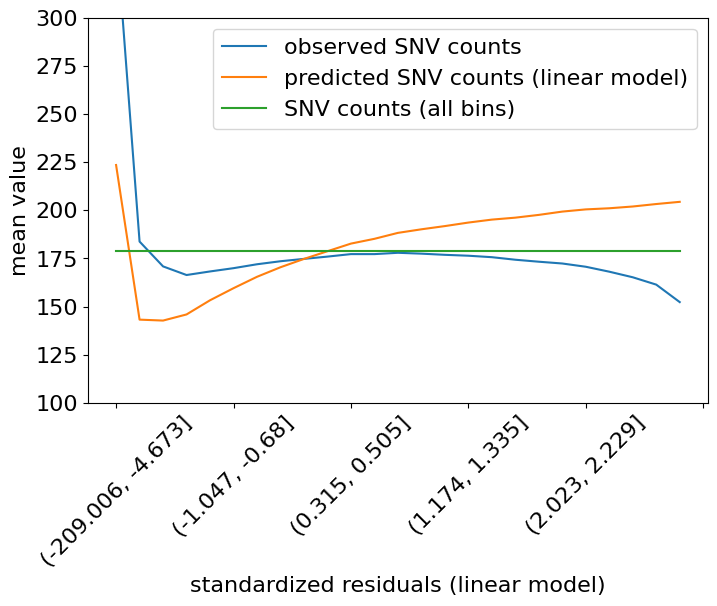

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


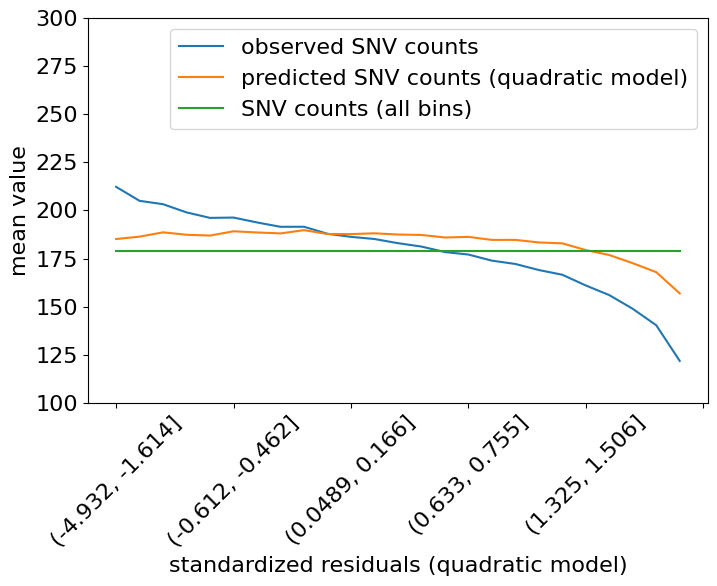

In [9]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

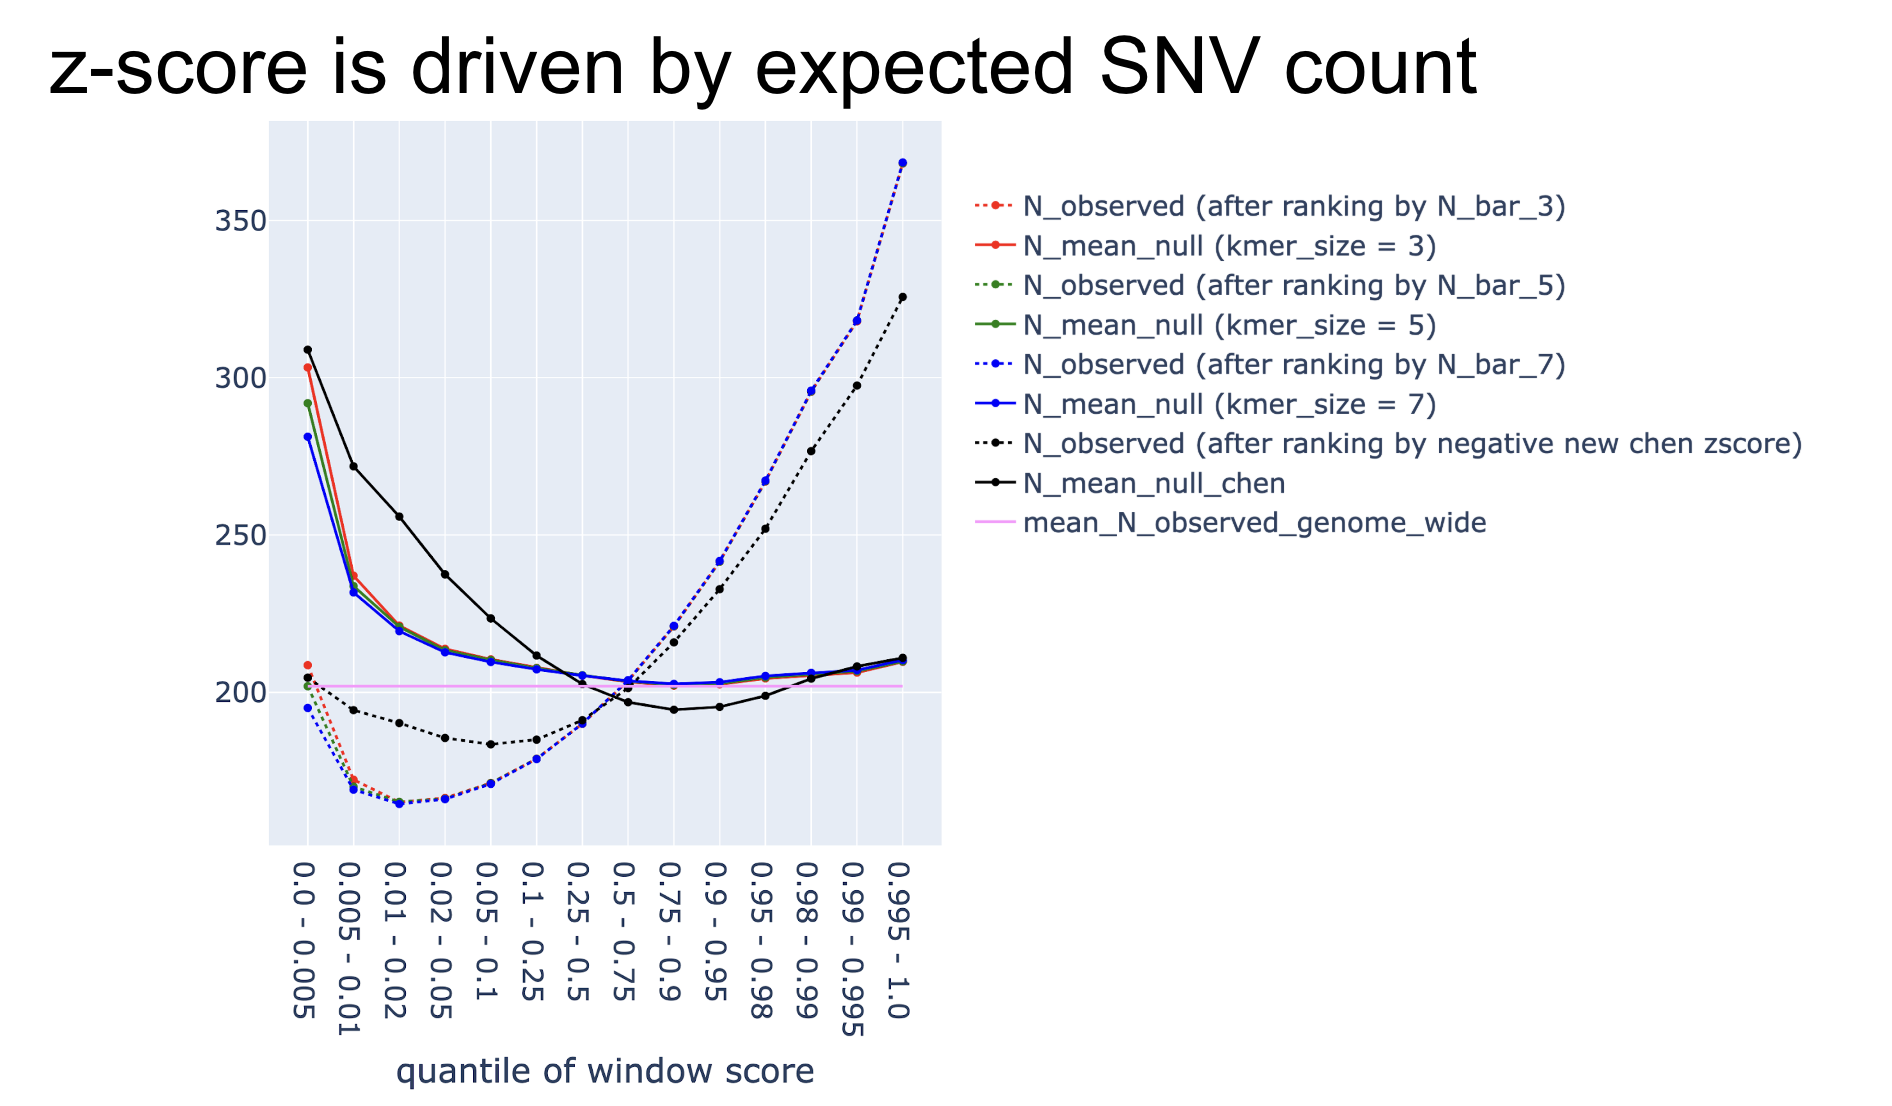

In [10]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)